## Caracterización

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

data = "Datos_Caracterizacion.xlsx"
data = pd.read_excel(data)
data

,I (A),B (mT),I_err (A),B_err (mT)
0,0.00,0.1,0.01,0.1
1,0.05,12.8,0.01,0.1
2,0.10,21.6,0.01,0.1
3,0.15,32.8,0.01,0.1
4,0.20,44.1,0.01,0.1
5,0.25,54.6,0.01,0.1
6,0.30,66.4,0.01,0.1
7,0.35,78.1,0.01,0.1
8,0.40,89.2,0.01,0.1
9,0.45,100.6,0.01,0.1


In [2]:
X = data['I (A)']
Xerr = data['I_err (A)']

Y = data['B (mT)']
Yerr = data['B_err (mT)']

w = 1/(Yerr**2)

Xerr

0     0.01
1     0.01
2     0.01
3     0.01
4     0.01
5     0.01
6     0.01
7     0.01
8     0.01
9     0.01
10    0.01
11    0.01
12    0.01
13    0.01
14    0.01
15    0.01
16    0.01
17    0.01
Name: I_err (A), dtype: float64

In [3]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

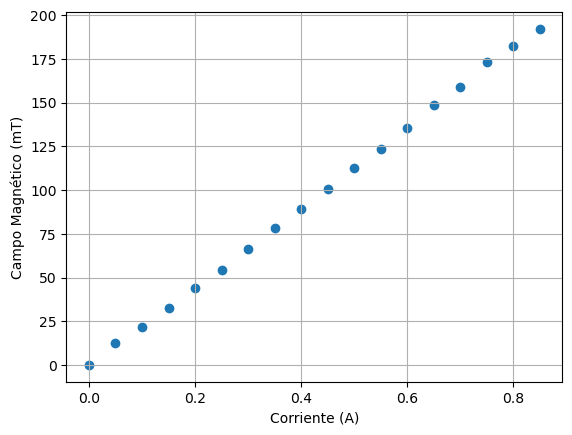

In [4]:
plt.scatter(X,Y)
plt.xlabel('Corriente (A)')
plt.ylabel('Campo Magnético (mT)')
plt.grid()

In [5]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

model = m*X + b

In [6]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

228.55314757481946
-1.1906432748538702
0.09086217008485095
0.04524139283588642


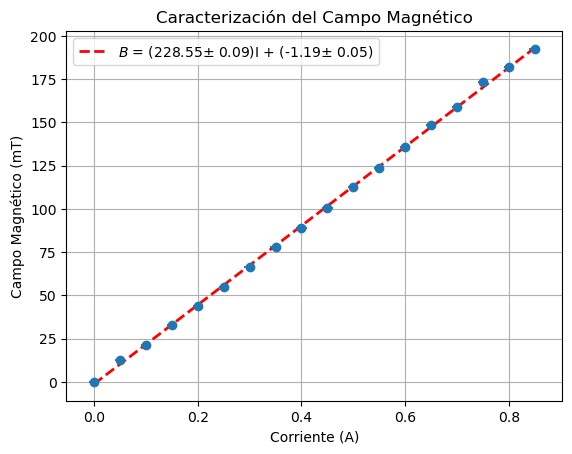

In [7]:
fig1, (ax1) = plt.subplots(1, 1)

ax1.plot(X,model, color='red', linewidth=2, linestyle='--', label=r'$B$'f' = ({m:.2f}± {m_std_err:.2f})' r'I' f' + ({b:.2f}± {b_std_err:.2f})')
ax1.errorbar(X, Y, Yerr, Xerr,  fmt='o')

ax1.set_xlabel('Corriente (A)')
ax1.set_ylabel('Campo Magnético (mT)')
ax1.legend(loc='upper left')
ax1.set_title('Caracterización del Campo Magnético')
ax1.grid()

plt.savefig('caracterización.png', format='png')

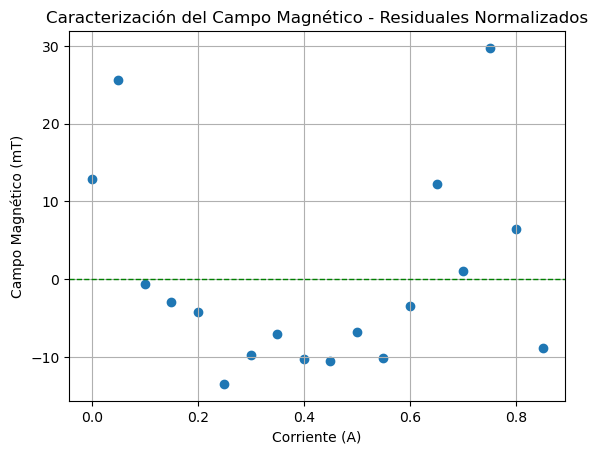

In [8]:
res = (Y - model)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_xlabel('Corriente (A)')
ax2.set_ylabel('Campo Magnético (mT)')
ax2.set_title('Caracterización del Campo Magnético - Residuales Normalizados')
ax2.grid()

plt.savefig('residuales_caracterización.png', format='png')